

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">SECONDHAND CARS DATA PRICE PREDICTION</h1>
   
</div>



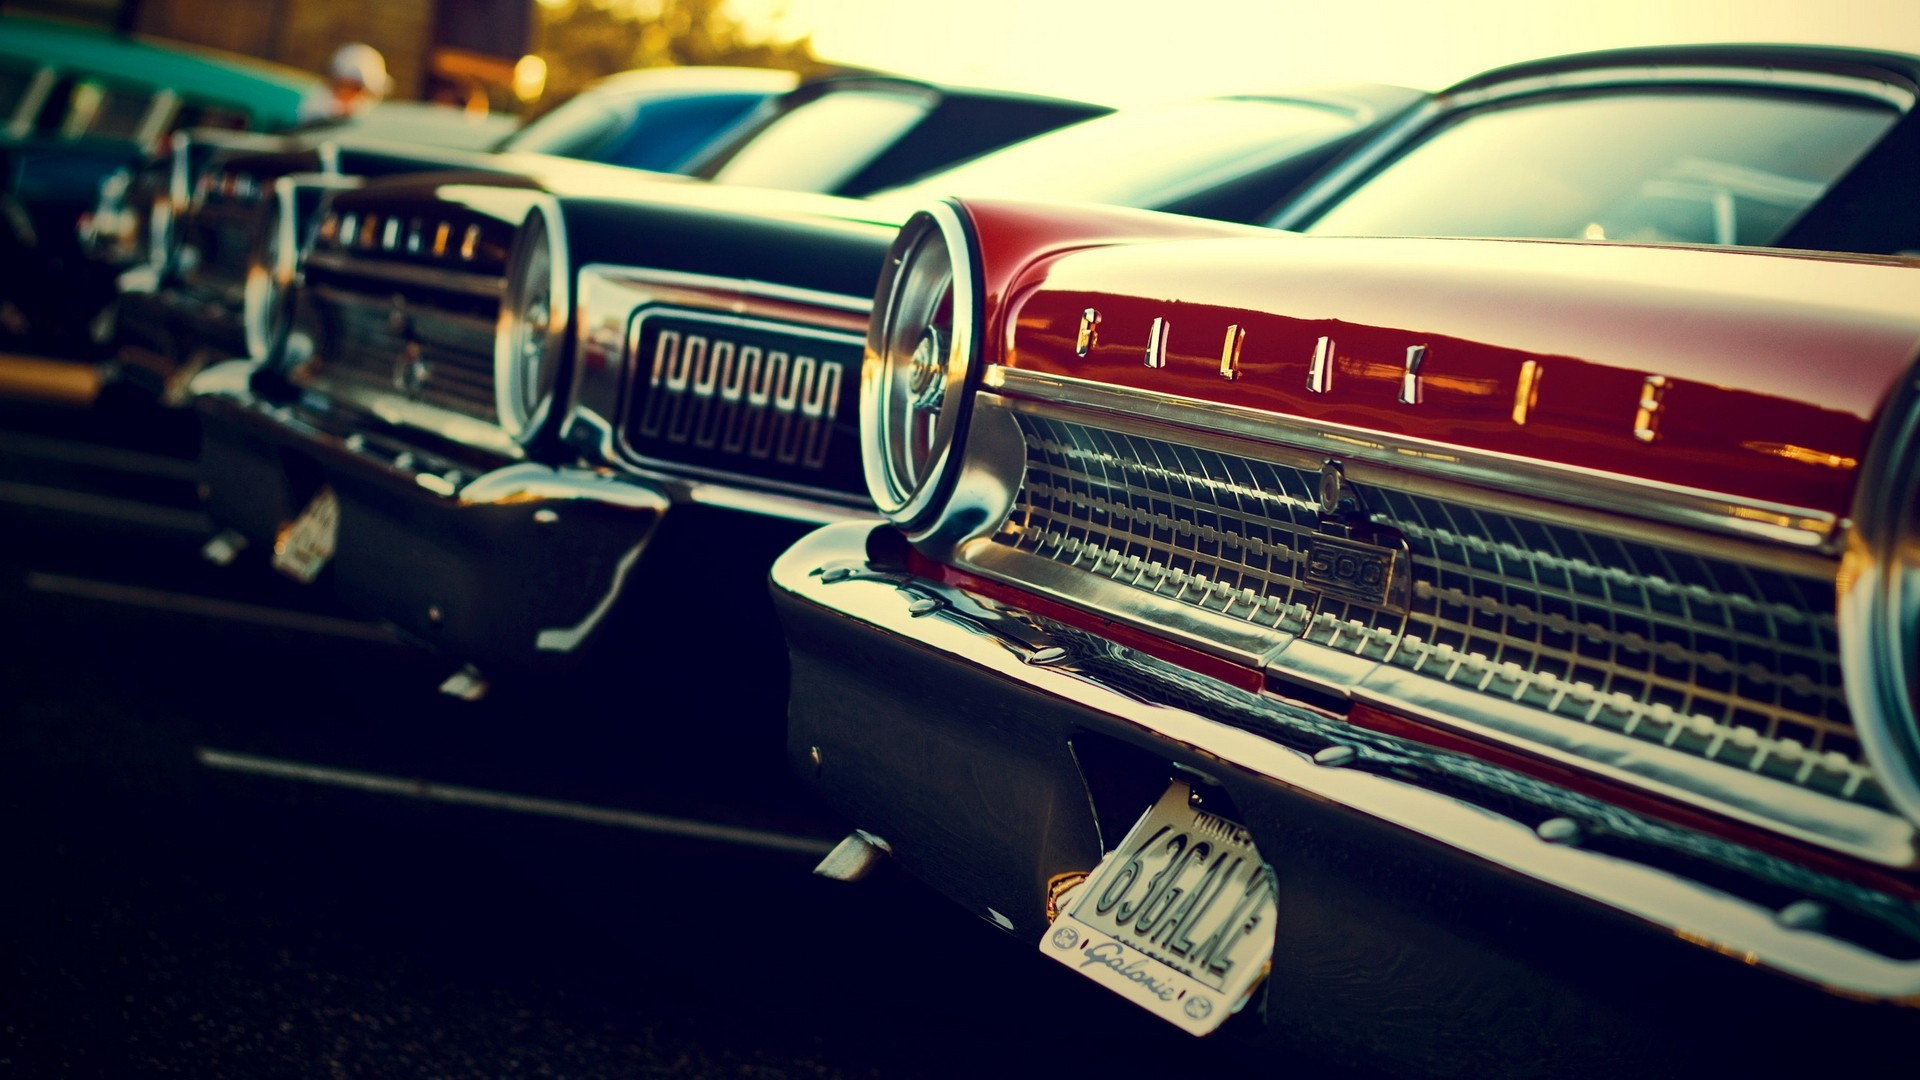

### In this project we predicting the price of secondhand car on the basis of on road price now, on road price old, KM driven, rating, condition etc

## USE

### This kind of prediction will help sellers estimate price of used cars to give tough competion to other sellers Also it will be usefull for Consumers to verify that they are paying best price for that used car.


<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">STEPS</h1>
   
</div>  

##### <center> 1. IMPORTING THE TOOLS_
##### <center> 2. UNDERSTANDING THE DATA_
##### <center> 3. EDA_
##### <center> 4. TRAINING & TESTING THE DATA_
##### <center> 5. MODEL SELECTION_
##### <center> 6. EVALUATION & PREDICTION_
##### <center> 7. VISUALIZING THE ACTUAL AND PREDICTED DATA_
##### <center> 8. CONCLUSION_


<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">1. IMPORTING THE TOOLS_</h1>
   
</div>  

In [32]:
#First let us import the necessary libraries

## Importing tools for reading and processing the data

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## importing data processing tools

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

#importing tools for graph

import matplotlib.pyplot as plt
import seaborn as sns
import klib   as k

## importing models for regression

from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">2. UNDERSTANDING THE DATA_</h1>
   
</div>


### Read the data

In [2]:
data=pd.read_csv("secondhand.csv")

In [3]:
## This would display the first five rows of the  DataFrame.
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
## DataFrame's information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
data.tail()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5


In [6]:
data.shape

(1000, 12)

In [7]:
data.isnull().mean()*100

v.id             0.0
on road old      0.0
on road now      0.0
years            0.0
km               0.0
rating           0.0
condition        0.0
economy          0.0
top speed        0.0
hp               0.0
torque           0.0
current price    0.0
dtype: float64

In [8]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">3.EDA_</h1>
   
</div>


### BOXPLOT

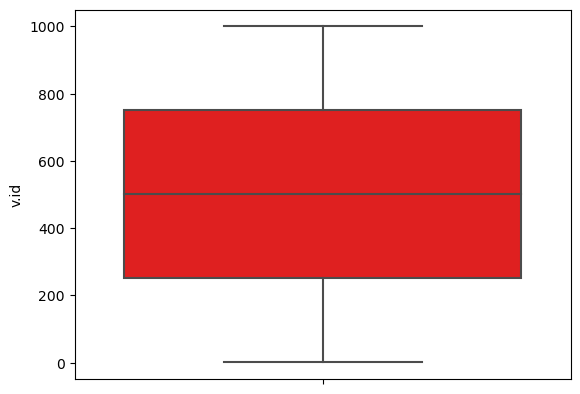

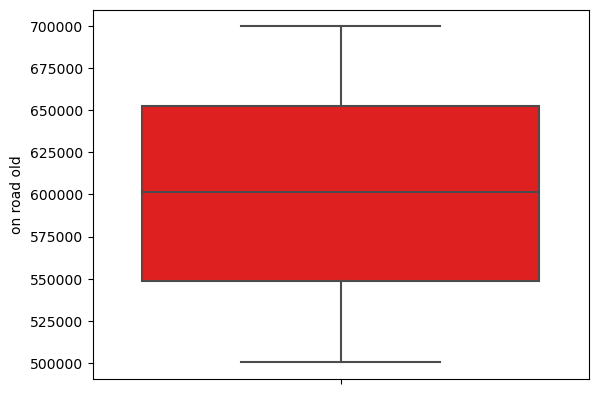

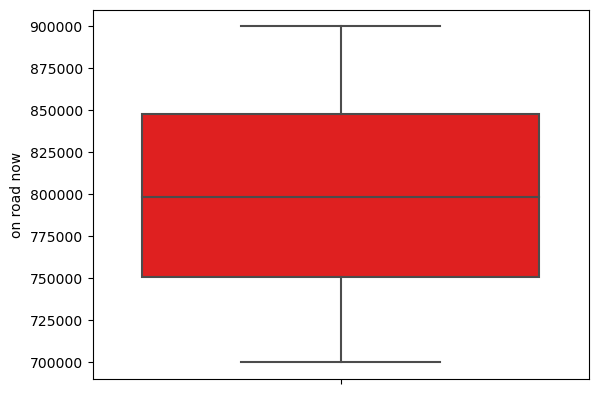

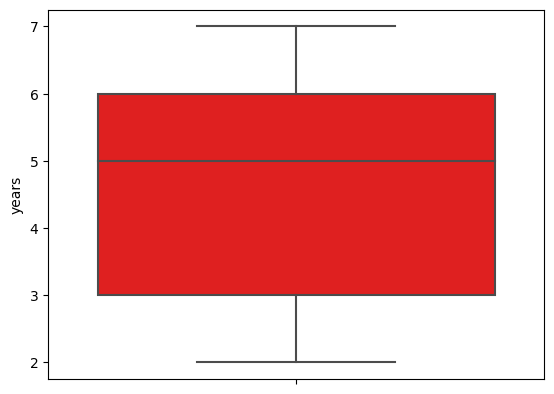

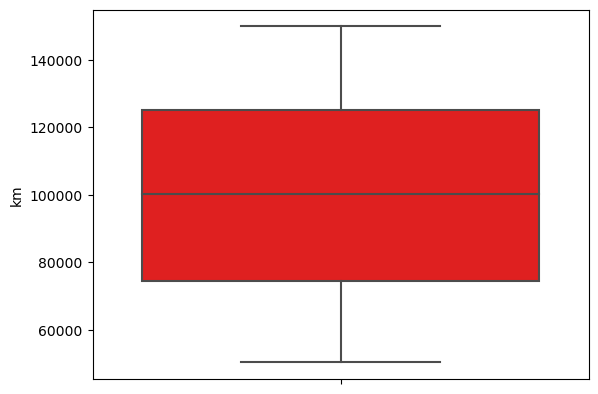

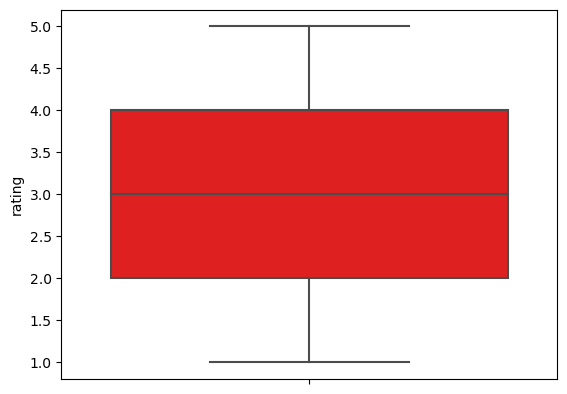

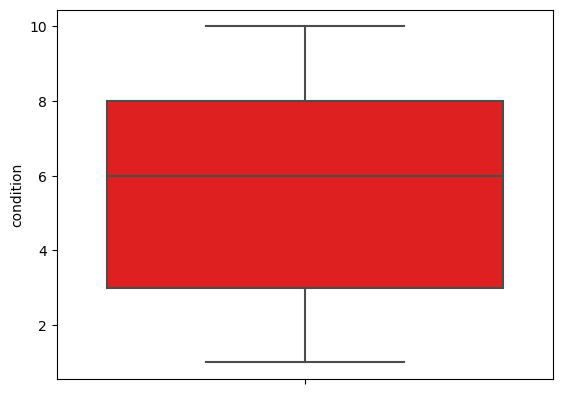

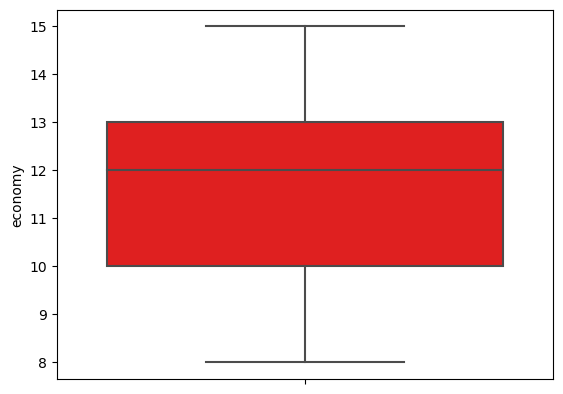

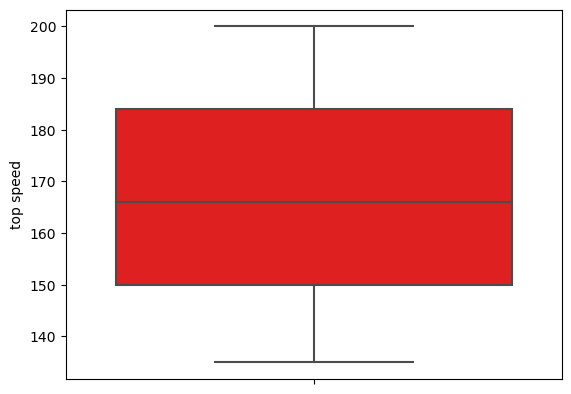

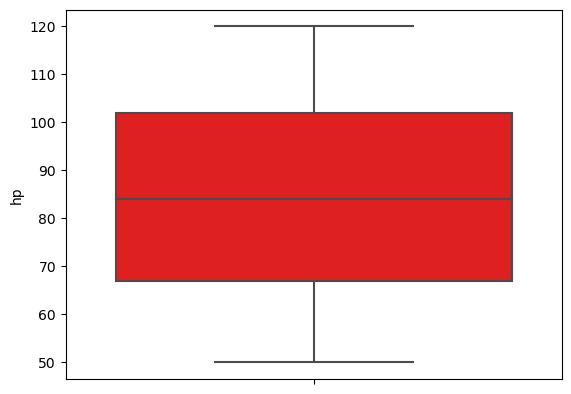

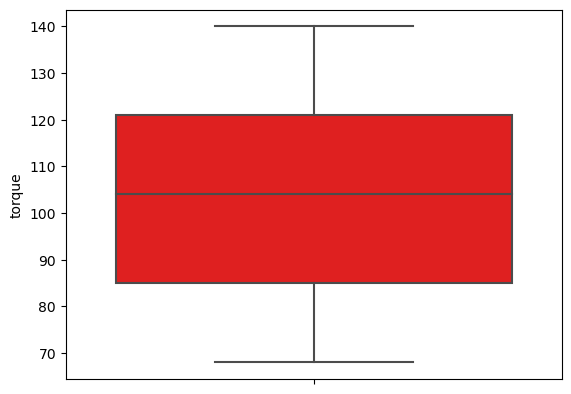

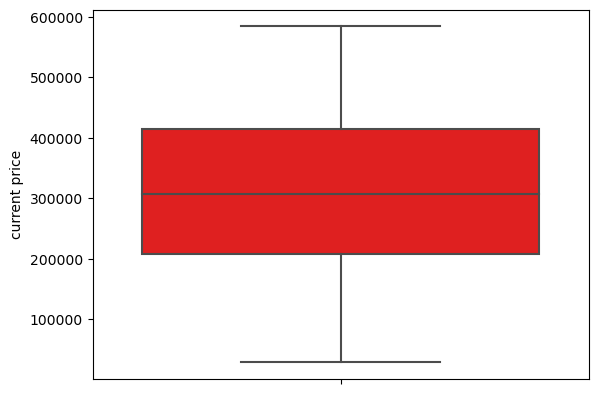

In [9]:
## draw the boxplot and checking the outliers of the dataset
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i],color='red')
        plt.show()

### HISTPLOT

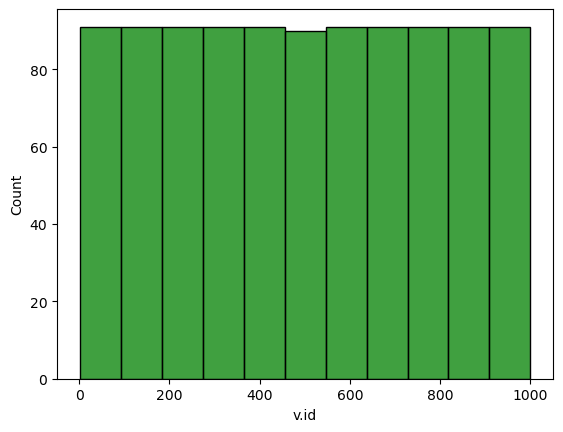

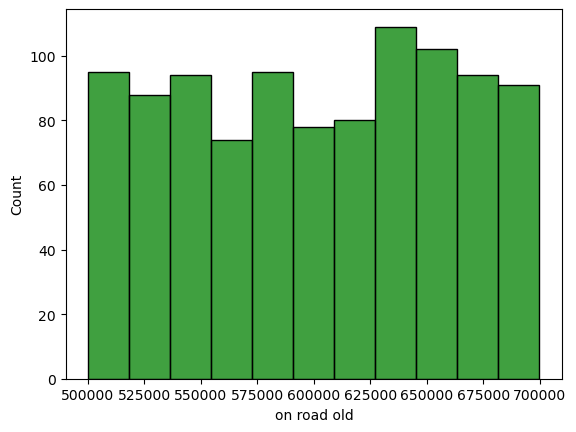

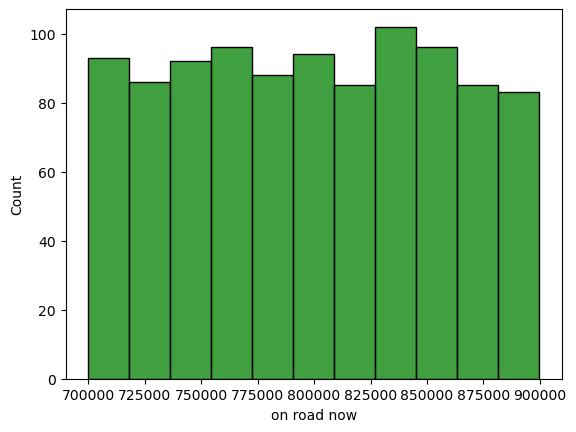

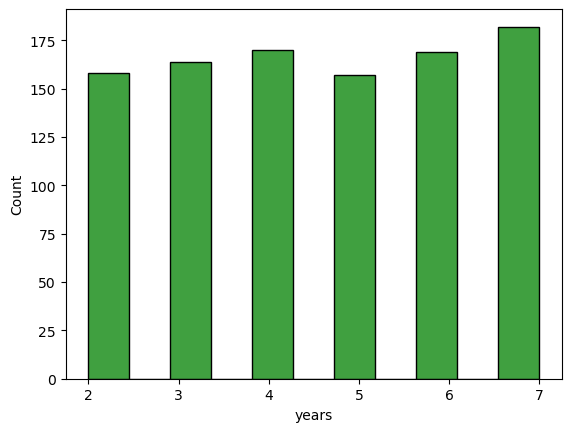

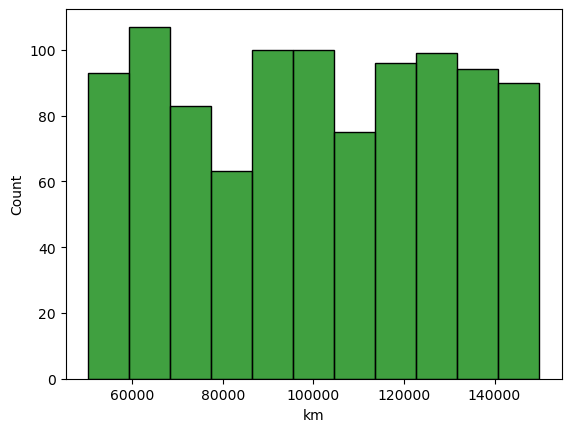

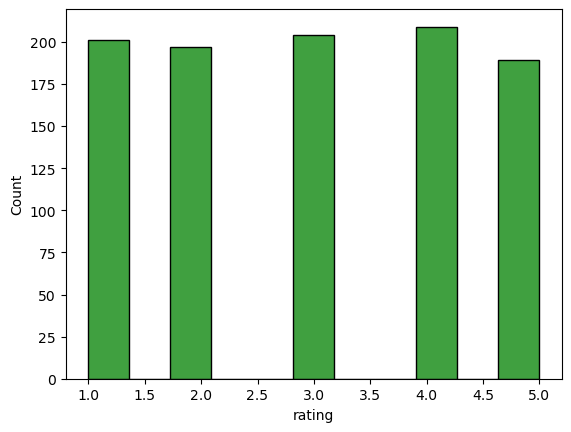

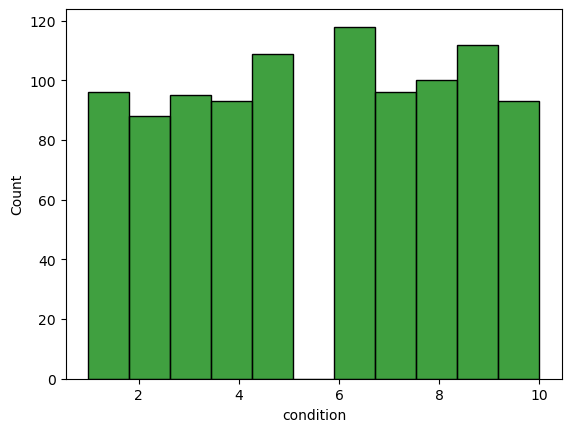

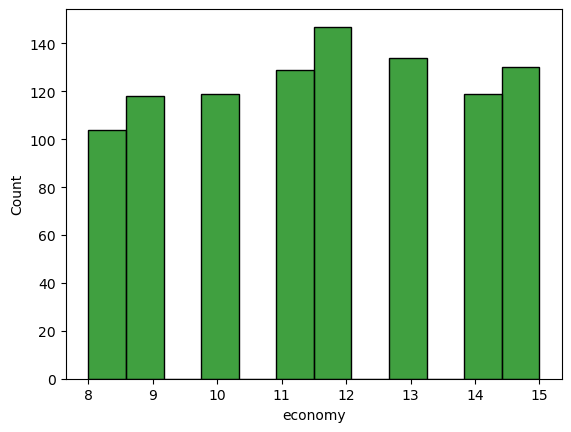

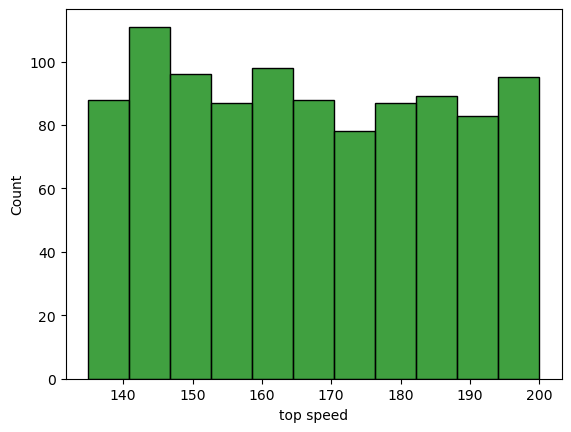

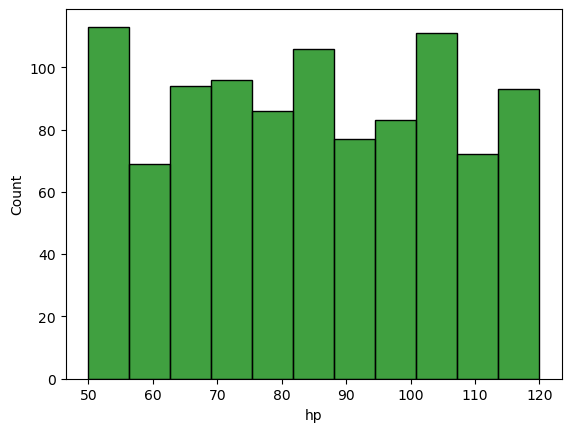

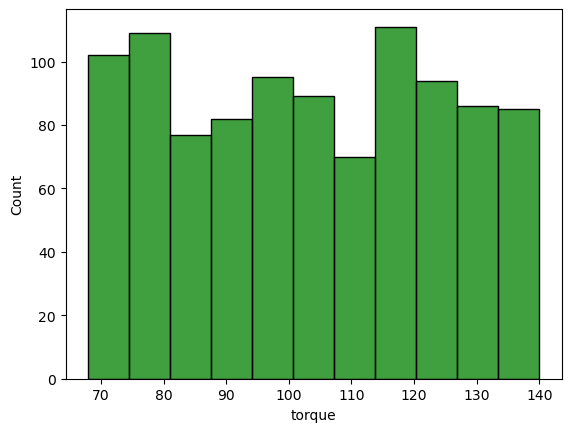

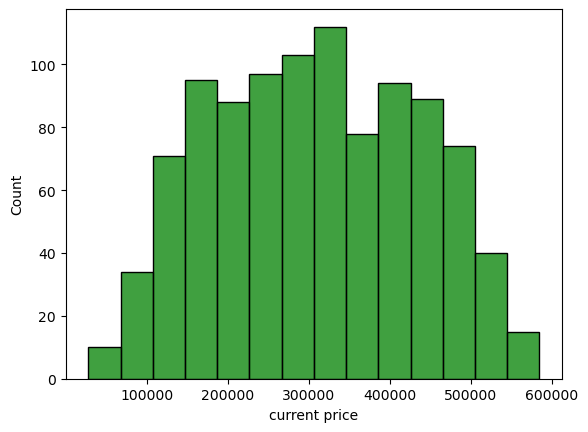

In [10]:
## histplot
for i in data.columns:
    if data[i].dtype !="object":
        sns.histplot(x=data[i],color="green")
        plt.show()

### KDEPLOT

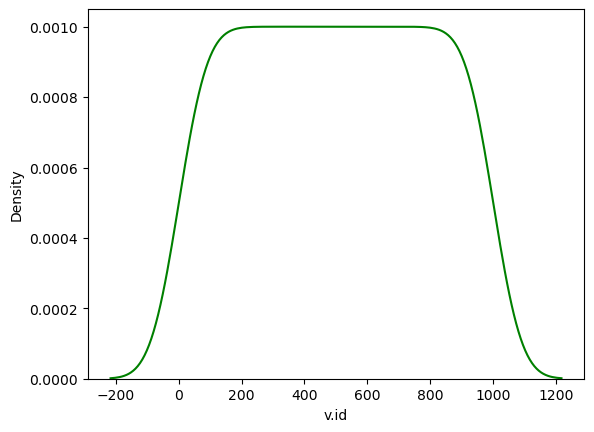

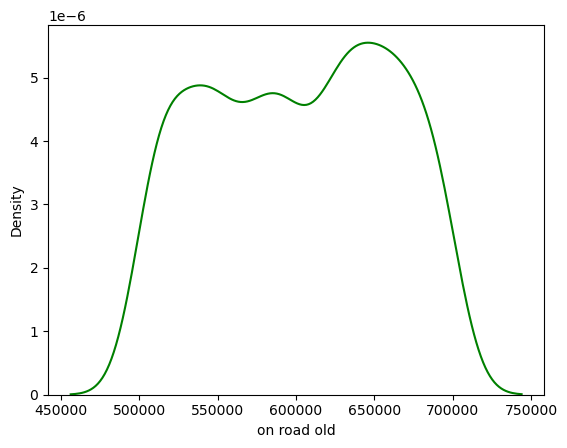

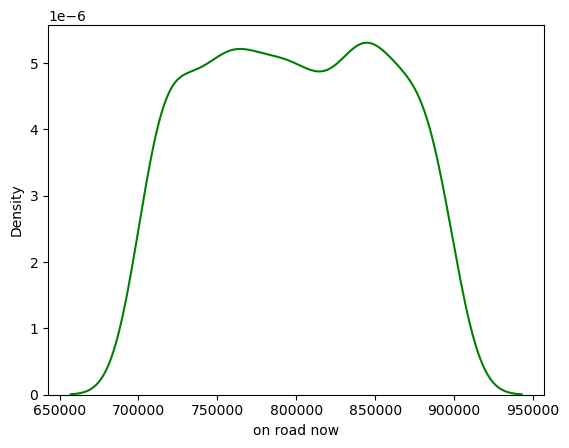

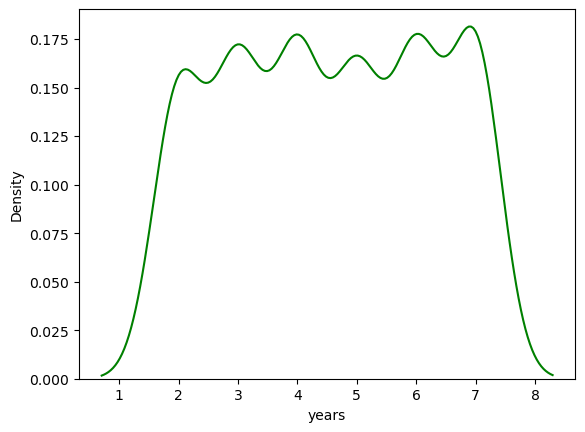

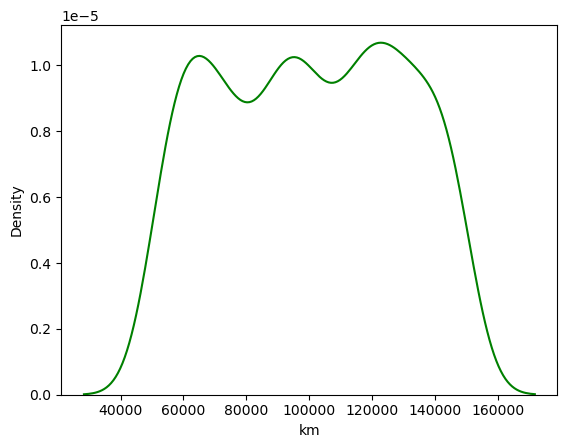

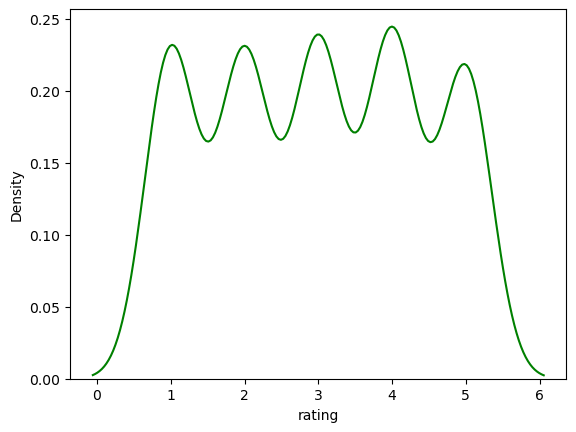

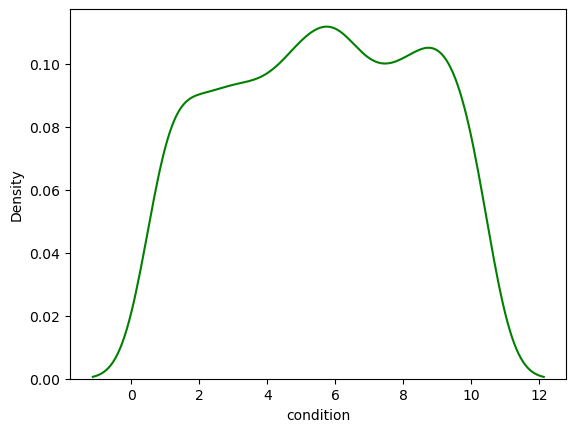

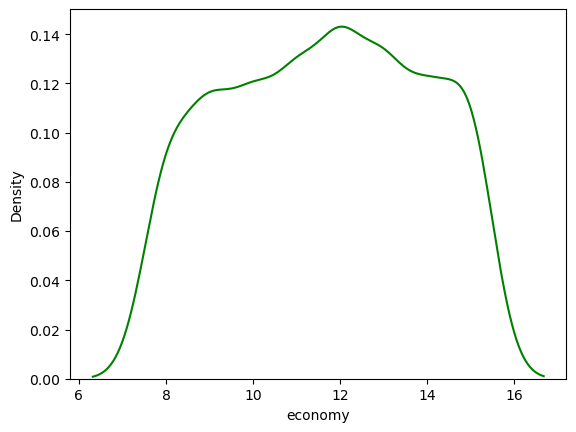

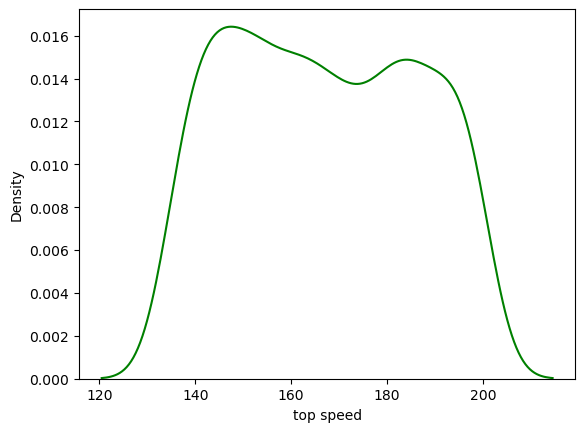

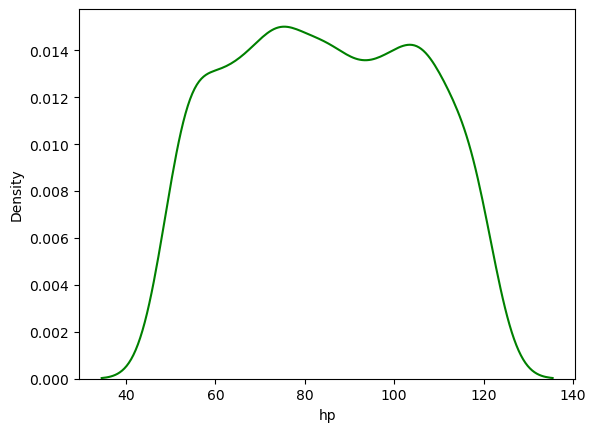

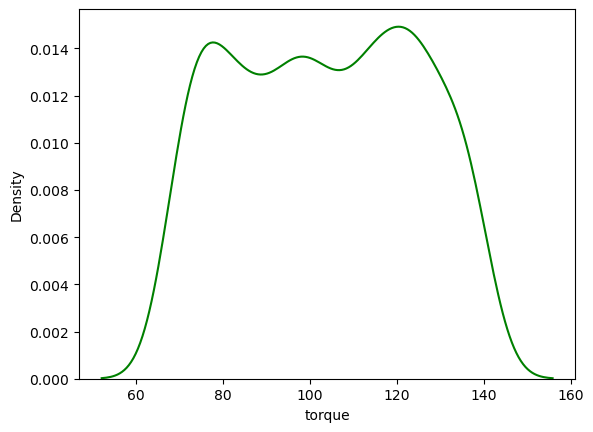

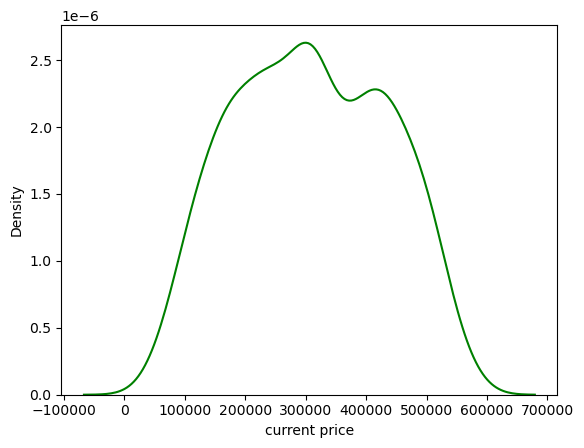

In [11]:
##  kdeplot
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i],color="green")
        plt.show()

In [13]:
## to drop the column v.id .
## we dont need vehicle id for price predition so we are droping this column.

data.drop(columns="v.id",inplace=True)

In [14]:
data

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,535559,732439,2,140478,4,5,9,184,112,128,74398.0


### HEATMAP

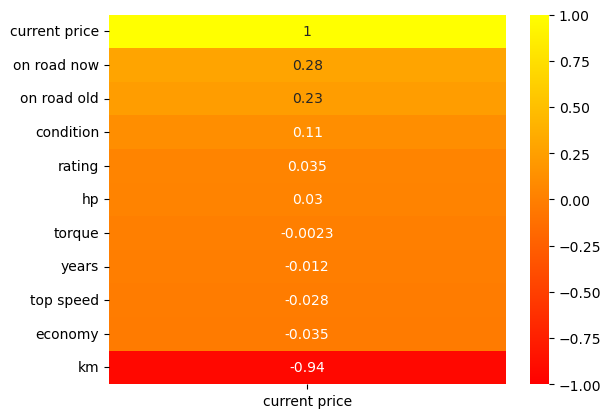

In [15]:
sns.heatmap(data.corr()[["current price"]].sort_values(by="current price",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

### SCATTERPLOT

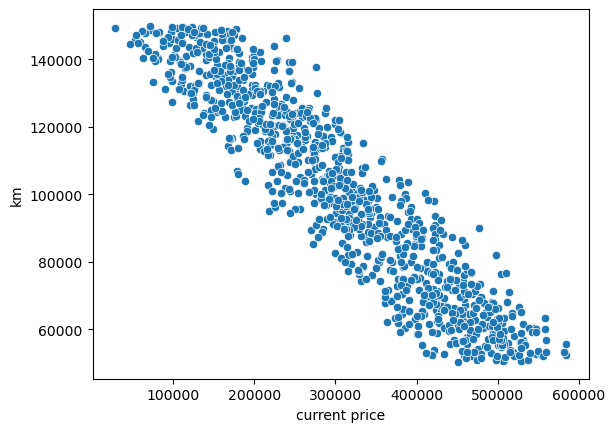

In [16]:
sns.scatterplot(x='current price',y='km',data=data);

### LINEPLOT

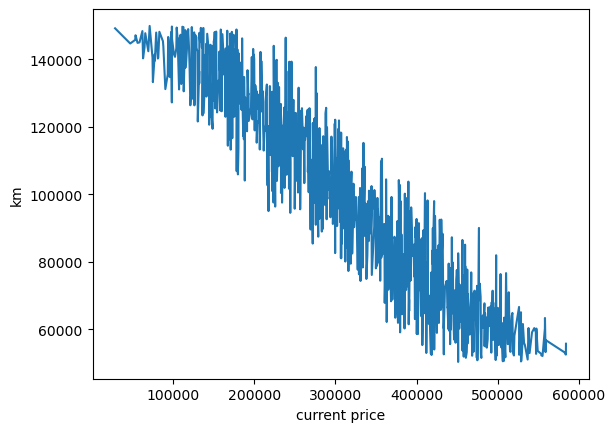

In [53]:
## IT SHOWS THE RELATIONSHIP BETWEEN CURRENT PRICE AND KM
sns.lineplot(x='current price',y='km',data=data);


<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">4. TRAINING & TESTING THE DATA_</h1>
   
</div> 

In [20]:
x= data.drop('current price',axis=1).values
y = data['current price'].values

In [21]:
sc=StandardScaler()

In [22]:
x=sc.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">5. MODEL SELECTION_</h1>
   
</div> 

### Applying models into the train and test data

In [25]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

### Finding the Model Accuracy

In [33]:
for name, model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train , y_train)*100
    testing_score = model.score(x_test , y_test)*100
    score = r2_score(y_test , model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:", testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 99.55621292249253
training_score: 99.51556818713031
testing_score: 99.55621292249253
mae: 6689.880453348712
mse: 62256022.32889849
rmse_test: 7890.248559386358
****************************************************************************************************
model trained with Ridge
r2score: 99.55550920818246
training_score: 99.51542669580921
testing_score: 99.55550920818246
mae: 6699.428309003264
mse: 62354741.86360846
rmse_test: 7896.501875109539
****************************************************************************************************
model trained with LinearSVR
r2score: -633.7177427965742
training_score: -589.5054667735308
testing_score: -633.7177427965742
mae: 298166.2434689878
mse: 102928522468.94121
rmse_test: 320824.7535165284
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score: 94.96709138449714
training_score: 100.0
testin

### Taking RandomForestRegressor as our model

In [41]:
model=RandomForestRegressor()

## MODEL TRAINING

### Fitting the train and test data into model

In [42]:
model.fit(x_train,y_train)

RandomForestRegressor()

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">6.EVALUATION & PREDICTION_</h1>
   
</div> 

## PRERDICTION

In [48]:
y_pred=model.predict(x)

In [49]:
prediction= pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)

In [50]:
prediction

,ACTUAL,PREDICTED
0,351318.0,352965.300
1,285001.5,272309.875
2,215386.0,203251.065
3,244295.5,248242.020
4,531114.5,525019.875
...,...,...
995,190744.0,194406.260
996,419748.0,416064.970
997,405871.0,409665.645
998,74398.0,78175.315


<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">7.VISUALIZING THE ACTUAL & PREDICTED DATA_</h1>
   
</div> 

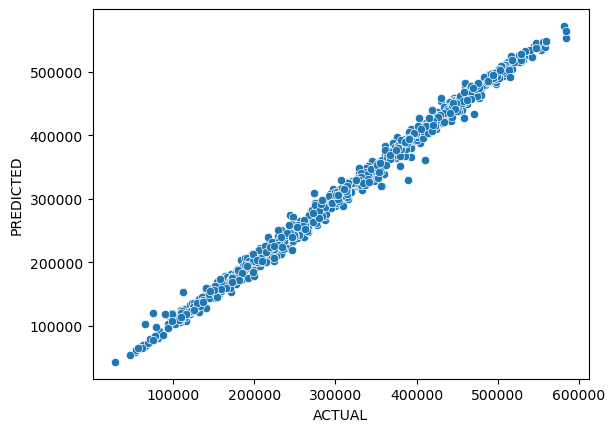

In [51]:
sns.scatterplot(data=prediction,x="ACTUAL",y="PREDICTED")
plt.show()

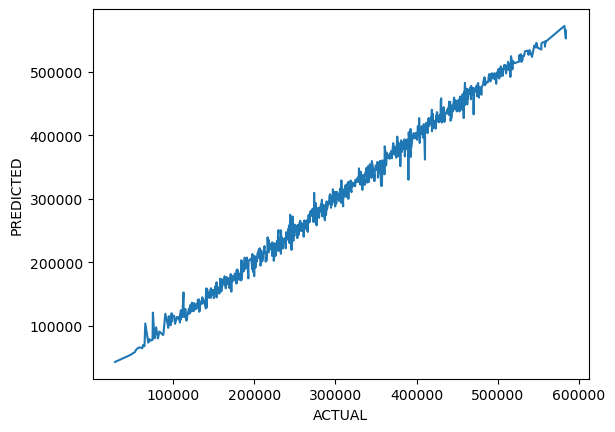

In [52]:
sns.lineplot(data=prediction,x="ACTUAL",y="PREDICTED")
plt.show()

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">8. CONCLUSION</h1>
   
</div>

<div style="background-color:MediumAquaMarine; padding: 10px; text-align: center;">
   
<h1 style="font-weight: bold; font-style: italic;">with this randomforest regression model i got 99% training accuracy , so it is perfect to implement</h1>
   
</div>